In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score

In [21]:
data = pd.read_csv("train.csv")
data.head()
print(data.shape)

(891, 12)


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
data["Embarked"] = data["Embarked"].fillna("S")

In [7]:
# Convert column to string for mor visibility
data['Survived'] = data['Survived'].map({0: 'Died',1: 'Survived'})

In [8]:
# Remove some features 
data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

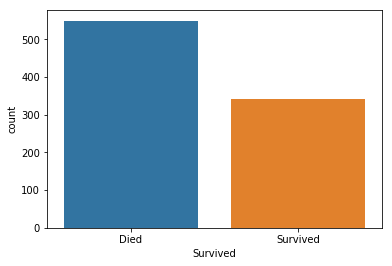

In [9]:
sns.countplot(data['Survived'])

Survived  Died  Survived
Sex                     
female      81       233
male       468       109


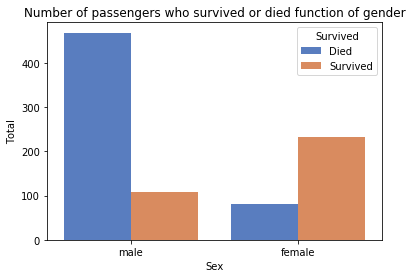

In [10]:
print(pd.crosstab(data['Sex'],data['Survived']))
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'muted', data = data)
ax.set(title = 'Number of passengers who survived or died function of gender', 
       xlabel = 'Sex', ylabel = 'Total')
plt.show()

Survived  Died  Survived
Pclass                  
1           80       136
2           97        87
3          372       119


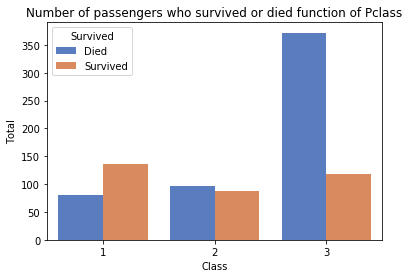

In [11]:
print(pd.crosstab(data['Pclass'],data['Survived']))
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'muted', data = data)
ax.set(title = 'Number of passengers who survived or died function of Pclass', 
       xlabel = 'Class', ylabel = 'Total')
plt.show()

In [12]:
# Replace strings by integers
data.Sex.replace(('male','female'), (0,1), inplace = True)
data.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
data.Survived.replace(('Died','Survived'), (0,1), inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


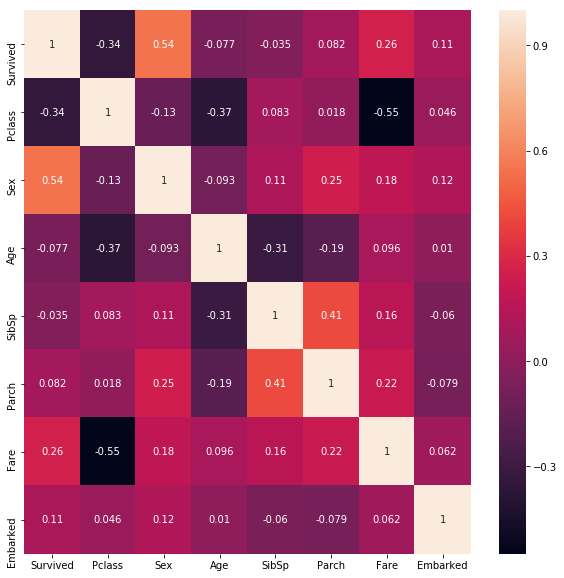

In [13]:
# Plot correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(data.astype(float).corr(), annot=True)
plt.show()

In [14]:
data['Age'] = data['Age'].fillna(data['Age'].median())
X = data.iloc[:,1:].astype(float)
y = data.iloc[:,0].astype(float)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train = scale(X_train)
X_test = scale(X_test)
clf = SVC(C=1, kernel='rbf',gamma=0.1)
clf.fit(X_train, y_train)


prediction = clf.predict(X_train)
acc_train = accuracy_score(y_train, prediction)
prediction = clf.predict(X_test)
acc_test = accuracy_score(y_test, prediction)
print("Train accuracy = {0}, Test accuracy = {1}".format(acc_train, acc_test))
clf.score(X_test,y_test)

Train accuracy = 0.8412921348314607, Test accuracy = 0.8100558659217877


0.8100558659217877

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', 
                                    random_state = 0, bootstrap=True,
                                    max_depth=60, min_samples_leaf=3,
                                    min_samples_split=8)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.8156424581005587

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.05)


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001],
              'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.fit(X_train,y_train)

c:\users\antoi\onedrive\bureau\environnements\mlearning\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ...........

[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.4s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 13.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [22]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [23]:
grid.best_score_

0.827247191011236